FAKE NEWS DETECTION

---
-Anish Kumar K & Saravanan R-


In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [ ]:
import numpy as np
from nltk import *
from nltk.corpus import stopwords
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import string
import re
from sklearn.metrics import *
from sklearn.decomposition import PCA
import numpy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dat.csv")
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \r\nAn Iranian woman has been sentenced ...,1


About the dataset: 4 columns - id, title, author, text, label

label = **0 for real** news 

label = **1 for fake** news

In [ ]:
#no of null values
data.isna().sum()

id         0
title      8
author    59
text       1
label      0
dtype: int64

In [ ]:
#filling null values with an empty string
data=data.fillna('')

Merging the author and test coulumn as a sepearte column 'content' which will be used for the further process, also we leave out the title column since the content column consists of all the features title column.

In [ ]:
# merging the author name and news title
data['content'] = data['author']+' '+data['text']

In [ ]:
data.shape

(499, 6)

DATA PREPROCESSING

In [ ]:
def remove_punc(text):
  text_p = "".join([char for char in text if char not in string.punctuation])
  return text_p

In [ ]:
def convert_lower(text):
  return text.lower()

In [ ]:
def tokenize(text):
  words = word_tokenize(text)
  return words

In [ ]:
def remove_small_words(text):
    return [x for x in text if len(x) > 3 ]

In [ ]:
def stop_words(text):
  stop_word = stopwords.words('english')
  filtered_words = [word for word in text if word not in stop_word]
  return filtered_words

In [ ]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language="english", ignore_stopwords=False)

def stem_it(text):
  return [stemmer.stem(word) for word in text]

In [ ]:
def lemmatize(text):
    word_net = WordNetLemmatizer()
    return [word_net.lemmatize(word) for word in text]

In [ ]:
data['removed_punc'] = data['content'].apply(lambda x: remove_punc(x))

data['lower']=data['removed_punc'].apply(lambda x: convert_lower(x))

data['tokens']=data['lower'].apply(lambda x:word_tokenize(x))

data['larger_tokens'] = data['tokens'].apply(lambda x : remove_small_words(x))

data['stop_words']=data['larger_tokens'].apply(lambda x : stop_words(x))

data['stemming']=data['stop_words'].apply(lambda x : stem_it(x))

data['lemmatize']=data['stemming'].apply(lambda x : lemmatize(x))

data['Featuresfinal']=data['lemmatize'].apply(' '.join)

data.head()

,id,title,author,text,label,content,removed_punc,lower,tokens,larger_tokens,stop_words,stemming,lemmatize,Featuresfinal
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...,Darrell Lucus House Dem Aide We Didn’t Even Se...,darrell lucus house dem aide we didn’t even se...,"[darrell, lucus, house, dem, aide, we, didn, ’...","[darrell, lucus, house, aide, didn, even, come...","[darrell, lucus, house, aide, even, comey, let...","[darrel, lucus, hous, aid, even, comey, letter...","[darrel, lucus, hous, aid, even, comey, letter...",darrel lucus hous aid even comey letter jason ...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,Daniel J. Flynn Ever get the feeling your life...,Daniel J Flynn Ever get the feeling your life ...,daniel j flynn ever get the feeling your life ...,"[daniel, j, flynn, ever, get, the, feeling, yo...","[daniel, flynn, ever, feeling, your, life, cir...","[daniel, flynn, ever, feeling, life, circles, ...","[daniel, flynn, ever, feel, life, circl, round...","[daniel, flynn, ever, feel, life, circl, round...",daniel flynn ever feel life circl roundabout r...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...,Consortiumnewscom Why the Truth Might Get You ...,consortiumnewscom why the truth might get you ...,"[consortiumnewscom, why, the, truth, might, ge...","[consortiumnewscom, truth, might, fired, octob...","[consortiumnewscom, truth, might, fired, octob...","[consortiumnewscom, truth, might, fire, octob,...","[consortiumnewscom, truth, might, fire, octob,...",consortiumnewscom truth might fire octob 2016 ...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss Videos 15 Civilians Killed In ...,Jessica Purkiss Videos 15 Civilians Killed In ...,jessica purkiss videos 15 civilians killed in ...,"[jessica, purkiss, videos, 15, civilians, kill...","[jessica, purkiss, videos, civilians, killed, ...","[jessica, purkiss, videos, civilians, killed, ...","[jessica, purkiss, video, civilian, kill, sing...","[jessica, purkiss, video, civilian, kill, sing...",jessica purkiss video civilian kill singl airs...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \r\nAn Iranian woman has been sentenced ...,1,Howard Portnoy Print \r\nAn Iranian woman has ...,Howard Portnoy Print \r\nAn Iranian woman has ...,howard portnoy print \r\nan iranian woman has ...,"[howard, portnoy, print, an, iranian, woman, h...","[howard, portnoy, print, iranian, woman, been,...","[howard, portnoy, print, iranian, woman, sente...","[howard, portnoy, print, iranian, woman, sente...","[howard, portnoy, print, iranian, woman, sente...",howard portnoy print iranian woman sentenc yea...


Exploratory data analysis

In [ ]:
from wordcloud import WordCloud
from textwrap import wrap
import seaborn as sns


for i in range(len(data['label'])):
  if data.label[i] == 0:
    class0 += data.Featuresfinal[i]
  if data.label[i] == 1:
    class1 += data.Featuresfinal[i]

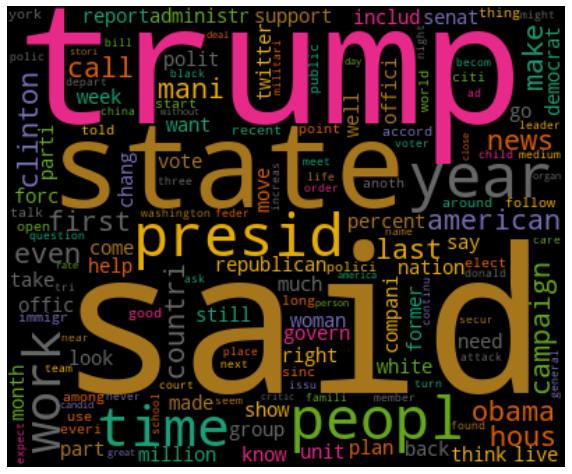

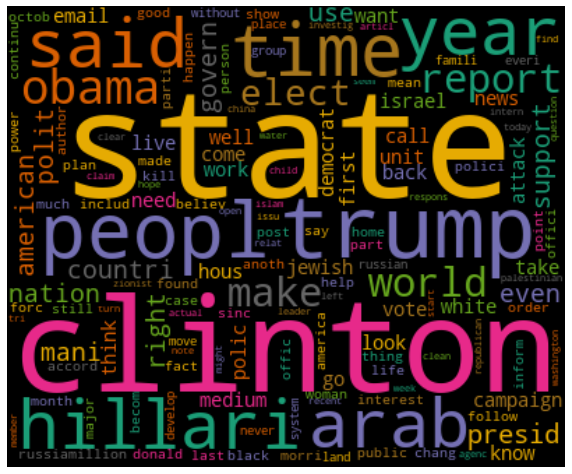

In [ ]:
word_cloud = WordCloud(width=400,height=330,max_words=150,colormap="Dark2",collocations = False).generate(class0)
# Display the generated Word Cloud
plt.figure(figsize=(10,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

word_cloud = WordCloud(width=400,height=330,max_words=150,colormap="Dark2",collocations = False).generate(class1)
# Display the generated Word Cloud
plt.figure(figsize=(10,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
X = data['Featuresfinal'].values
Y = data['label'].values

print(X,Y)

VECTORIZATION OF THE INPUT FEATURE

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=4000)
vectors = vectorizer.fit_transform(data['Featuresfinal'])
print("Vocabulary: ", vectorizer.vocabulary_)

l=len(vectorizer.get_feature_names_out())
print(l)
print(vectors)

Vocabulary:  {'darrel': 932, 'hous': 1768, 'aid': 121, 'even': 1291, 'comey': 713, 'letter': 2105, 'jason': 1957, 'chaffetz': 594, 'tweet': 3716, 'octob': 2489, '2016': 29, 'subscrib': 3456, 'american': 178, 'utah': 3789, 'imag': 1814, 'courtesi': 861, 'michael': 2295, 'avail': 307, 'creativ': 875, 'licens': 2117, 'apolog': 217, 'keith': 2011, 'doubt': 1112, 'worst': 3959, 'person': 2647, 'world': 3953, 'week': 3892, 'director': 1048, 'jame': 1953, 'accord': 57, 'democrat': 986, 'look': 2160, 'like': 2125, 'also': 160, 'know': 2034, 'well': 3900, 'turn': 3714, 'sent': 3174, 'announc': 198, 'email': 1202, 'relat': 2955, 'hillari': 1733, 'clinton': 673, 'server': 3185, 'rank': 2890, 'relev': 2960, 'committe': 723, 'hear': 1697, 'found': 1490, 'republican': 2985, 'chairman': 597, 'member': 2275, 'intellig': 1899, 'judiciari': 1991, 'oversight': 2560, 'agenc': 112, 'review': 3024, 'recent': 2917, 'discov': 1061, 'order': 2525, 'contain': 800, 'classifi': 662, 'inform': 1865, 'long': 2155, 

In [ ]:
X=vectors.toarray()
Y = data['label'].values
print(X)
print(Y)
realX = X.copy()

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.04401299 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1
 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0
 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0
 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0
 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1
 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1
 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0
 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 

Splitting the dataset to training & test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25,stratify=Y, random_state=2)
print(X_train, X_test, y_train, y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.02970873 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.02775679 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] [1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1
 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0
 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 1
 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0
 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1
 0 1 0 0 0 0 1 0 0 1 1 0 

Training model using logistic regression

In [ ]:
Eta = 1
w=np.array([0.5]*(l+1))
epoch = 0
convergence = False
while not convergence:
    epoch = epoch + 1
    w_old = w.copy() 
    for x,y in zip(X_train,y_train):
        X = np.array([1,*x])
        wTx = np.dot(X,w.T)
        sigma = 1/(1+np.exp(-wTx))
        if sigma >= 0.5:
            y_hat = 1
        else:
            y_hat = 0
        if y_hat != y:
            w = w + Eta*(y - sigma)*X
    print("Weight vector at epoch",epoch,"is",w)
    
    if np.allclose(w_old,w):
        print("Convergence obtained")
        convergence = True

prediction=[]
for x,y in zip(X_test, y_test):
    X = np.array([1,*x])
    wTx = np.dot(X,w.T)
    sigma = 1/(1+np.exp(-wTx))
    if sigma >= 0.5:
        yhat = 1
    else:
        yhat = 0
    prediction.append(yhat)

Weight vector at epoch 1 is [-2.21614834  0.57424644  0.51795876 ...  1.31810331  0.5
  0.5464014 ]
Weight vector at epoch 2 is [-1.36658933  0.60697075  0.51795876 ...  1.49169315  0.5
  0.57242399]
Weight vector at epoch 3 is [-1.44587115  0.61580675  0.51795876 ...  1.49169315  0.5
  0.57242399]
Weight vector at epoch 4 is [-1.36091339  0.61580675  0.51795876 ...  1.49169315  0.5
  0.57242399]
Weight vector at epoch 5 is [-1.60031366  0.61580675  0.51795876 ...  1.49169315  0.5
  0.57242399]
Weight vector at epoch 6 is [-1.32222877  0.61580675  0.51795876 ...  1.49169315  0.5
  0.57242399]
Weight vector at epoch 7 is [-1.05465126  0.61580675  0.51795876 ...  1.49169315  0.5
  0.57242399]
Weight vector at epoch 8 is [-1.34045465  0.61580675  0.51795876 ...  1.49169315  0.5
  0.57242399]
Weight vector at epoch 9 is [-1.0887205   0.61580675  0.51795876 ...  1.49169315  0.5
  0.57242399]
Weight vector at epoch 10 is [-1.35937336  0.61580675  0.51795876 ...  1.49169315  0.5
  0.57242399]

In [ ]:
print(accuracy_score(y_test,prediction))

0.68


In [ ]:
print(classification_report(y_test, prediction))
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.80      0.51      0.62        65
           1       0.62      0.87      0.72        60

    accuracy                           0.68       125
   macro avg       0.71      0.69      0.67       125
weighted avg       0.72      0.68      0.67       125

[[33 32]
 [ 8 52]]


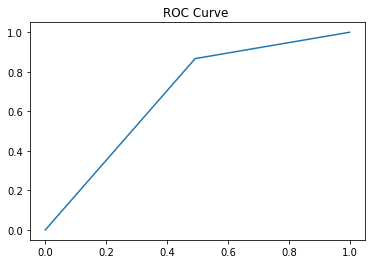

Area under curve : 


0.6871794871794872

In [ ]:
fpr, tpr, x = roc_curve(y_test,prediction)
plt.title('ROC Curve ')
plt.plot(fpr,tpr)
plt.show()
print("Area under curve : ")
roc_auc_score(y_test,prediction) 

In [ ]:
dct=dict()
dct['Logistic_Regression'] = round(accuracy_score(y_test, prediction)*100,2)

PERCEPTRON

In [ ]:
w = np.array([0.5]*(l+1))
epoch = 0
convergence = False
while not convergence:
    epoch = epoch + 1
    w_old = w.copy() 
    for x,y in zip(X_train,y_train):
        X = np.array([1,*x])
        wTx = np.dot(X,w.T)
        if wTx >= 0:
            yhat = 1
        else:
            yhat = 0
            
        if y == 0 and yhat == 1:
            w = w-X
        elif y == 1 and yhat == 0:
            w = w+X
    print("Weight vector at epoch",epoch,"is",w)
    
    if np.allclose(w_old,w) :
        print("Convergence obtained")
        convergence = True

prediction=[]
for x,y in zip(X_test, y_test):
    X = np.array([1,*x])
    wTx = np.dot(X,w.T)
    if wTx >= 0:
        yhat = 1
    else:
        yhat = 0
    prediction.append(yhat)
        
accuracy_score(y_test,prediction)

Weight vector at epoch 1 is [-1.5         0.60824982  0.52672994 ...  1.37445914  0.5
  0.55124731]
Weight vector at epoch 2 is [-1.5         0.67044325  0.52672994 ...  1.90706097  0.5
  0.55124731]
Weight vector at epoch 3 is [-1.5         0.71445623  0.52672994 ...  1.90706097  0.5
  0.55124731]
Weight vector at epoch 4 is [-1.5         0.71445623  0.52672994 ...  1.90706097  0.5
  0.55124731]
Weight vector at epoch 5 is [-1.5         0.71445623  0.52672994 ...  1.90706097  0.5
  0.55124731]
Weight vector at epoch 6 is [-1.5         0.71445623  0.52672994 ...  1.90706097  0.5
  0.55124731]
Weight vector at epoch 7 is [-1.5         0.71445623  0.52672994 ...  1.90706097  0.5
  0.55124731]
Weight vector at epoch 8 is [-1.5         0.71445623  0.52672994 ...  1.90706097  0.5
  0.55124731]
Weight vector at epoch 9 is [-1.5         0.73191782  0.52672994 ...  1.90706097  0.5
  0.55124731]
Weight vector at epoch 10 is [-1.5         0.73191782  0.52672994 ...  1.90706097  0.5
  0.55124731]

0.696

              precision    recall  f1-score   support

           0       0.81      0.54      0.65        65
           1       0.63      0.87      0.73        60

    accuracy                           0.70       125
   macro avg       0.72      0.70      0.69       125
weighted avg       0.73      0.70      0.69       125

[[35 30]
 [ 8 52]]


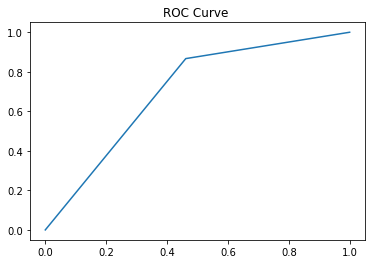

Area under curve : 


0.7025641025641025

In [ ]:
print(classification_report(y_test, prediction))
print(confusion_matrix(y_test,prediction))

fpr, tpr, x = roc_curve(y_test,prediction)
plt.title('ROC Curve ')
plt.plot(fpr,tpr)
plt.show()
print("Area under curve : ")
roc_auc_score(y_test,prediction)

In [ ]:
dct['Perceptron'] = round(accuracy_score(y_test, prediction)*100,2)

SVM


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

svc = SVC(kernel = 'linear',gamma='auto')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        65
           1       0.86      0.82      0.84        60

    accuracy                           0.85       125
   macro avg       0.85      0.85      0.85       125
weighted avg       0.85      0.85      0.85       125

[[57  8]
 [11 49]]


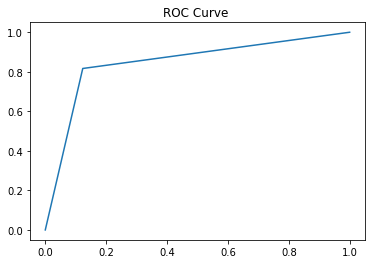

Area under curve : 


0.8467948717948718

In [ ]:
fpr, tpr, x = roc_curve(y_test,y_pred)
plt.title('ROC Curve ')
plt.plot(fpr,tpr)
plt.show()
print("Area under curve : ")
roc_auc_score(y_test,y_pred)

In [ ]:
dct['SVM_linear'] = round(accuracy_score(y_test,y_pred)*100,2)

In [ ]:
svc = SVC(kernel = 'sigmoid',gamma='auto')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.52
[[65  0]
 [60  0]]


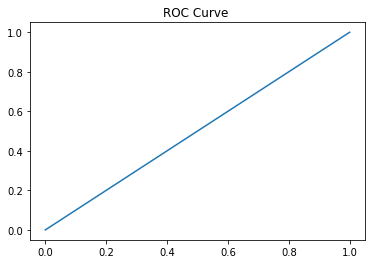

Area under curve : 


0.5

In [ ]:
fpr, tpr, x = roc_curve(y_test,y_pred)
plt.title('ROC Curve ')
plt.plot(fpr,tpr)
plt.show()
print("Area under curve : ")
roc_auc_score(y_test,y_pred)

In [ ]:
dct['SVM_sigmoid'] = round(accuracy_score(y_test, y_pred)*100,2)

In [ ]:
svc = SVC(kernel = 'rbf',gamma='auto')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.52
[[65  0]
 [60  0]]


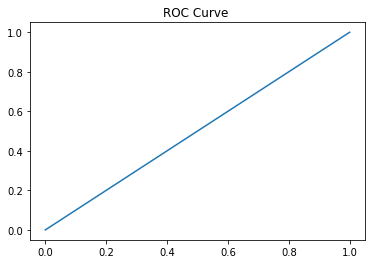

Area under curve : 


0.5

In [ ]:
fpr, tpr, x = roc_curve(y_test,y_pred)
plt.title('ROC Curve ')
plt.plot(fpr,tpr)
plt.show()
print("Area under curve : ")
roc_auc_score(y_test,y_pred)

In [ ]:
dct['SVM_rbf'] = round(accuracy_score(y_test, y_pred)*100,2)

In [ ]:
svc = SVC(kernel = 'poly',gamma='auto')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.52
[[65  0]
 [60  0]]


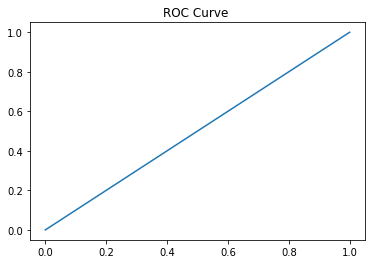

Area under curve : 


0.5

In [ ]:
fpr, tpr, x = roc_curve(y_test,y_pred)
plt.title('ROC Curve ')
plt.plot(fpr,tpr)
plt.show()
print("Area under curve : ")
roc_auc_score(y_test,y_pred)

In [ ]:
dct['SVM_poly'] = round(accuracy_score(y_test, y_pred)*100,2)

DECISION TREE

              precision    recall  f1-score   support

           0       0.75      0.68      0.71        65
           1       0.68      0.75      0.71        60

    accuracy                           0.71       125
   macro avg       0.71      0.71      0.71       125
weighted avg       0.72      0.71      0.71       125

[[44 21]
 [15 45]]


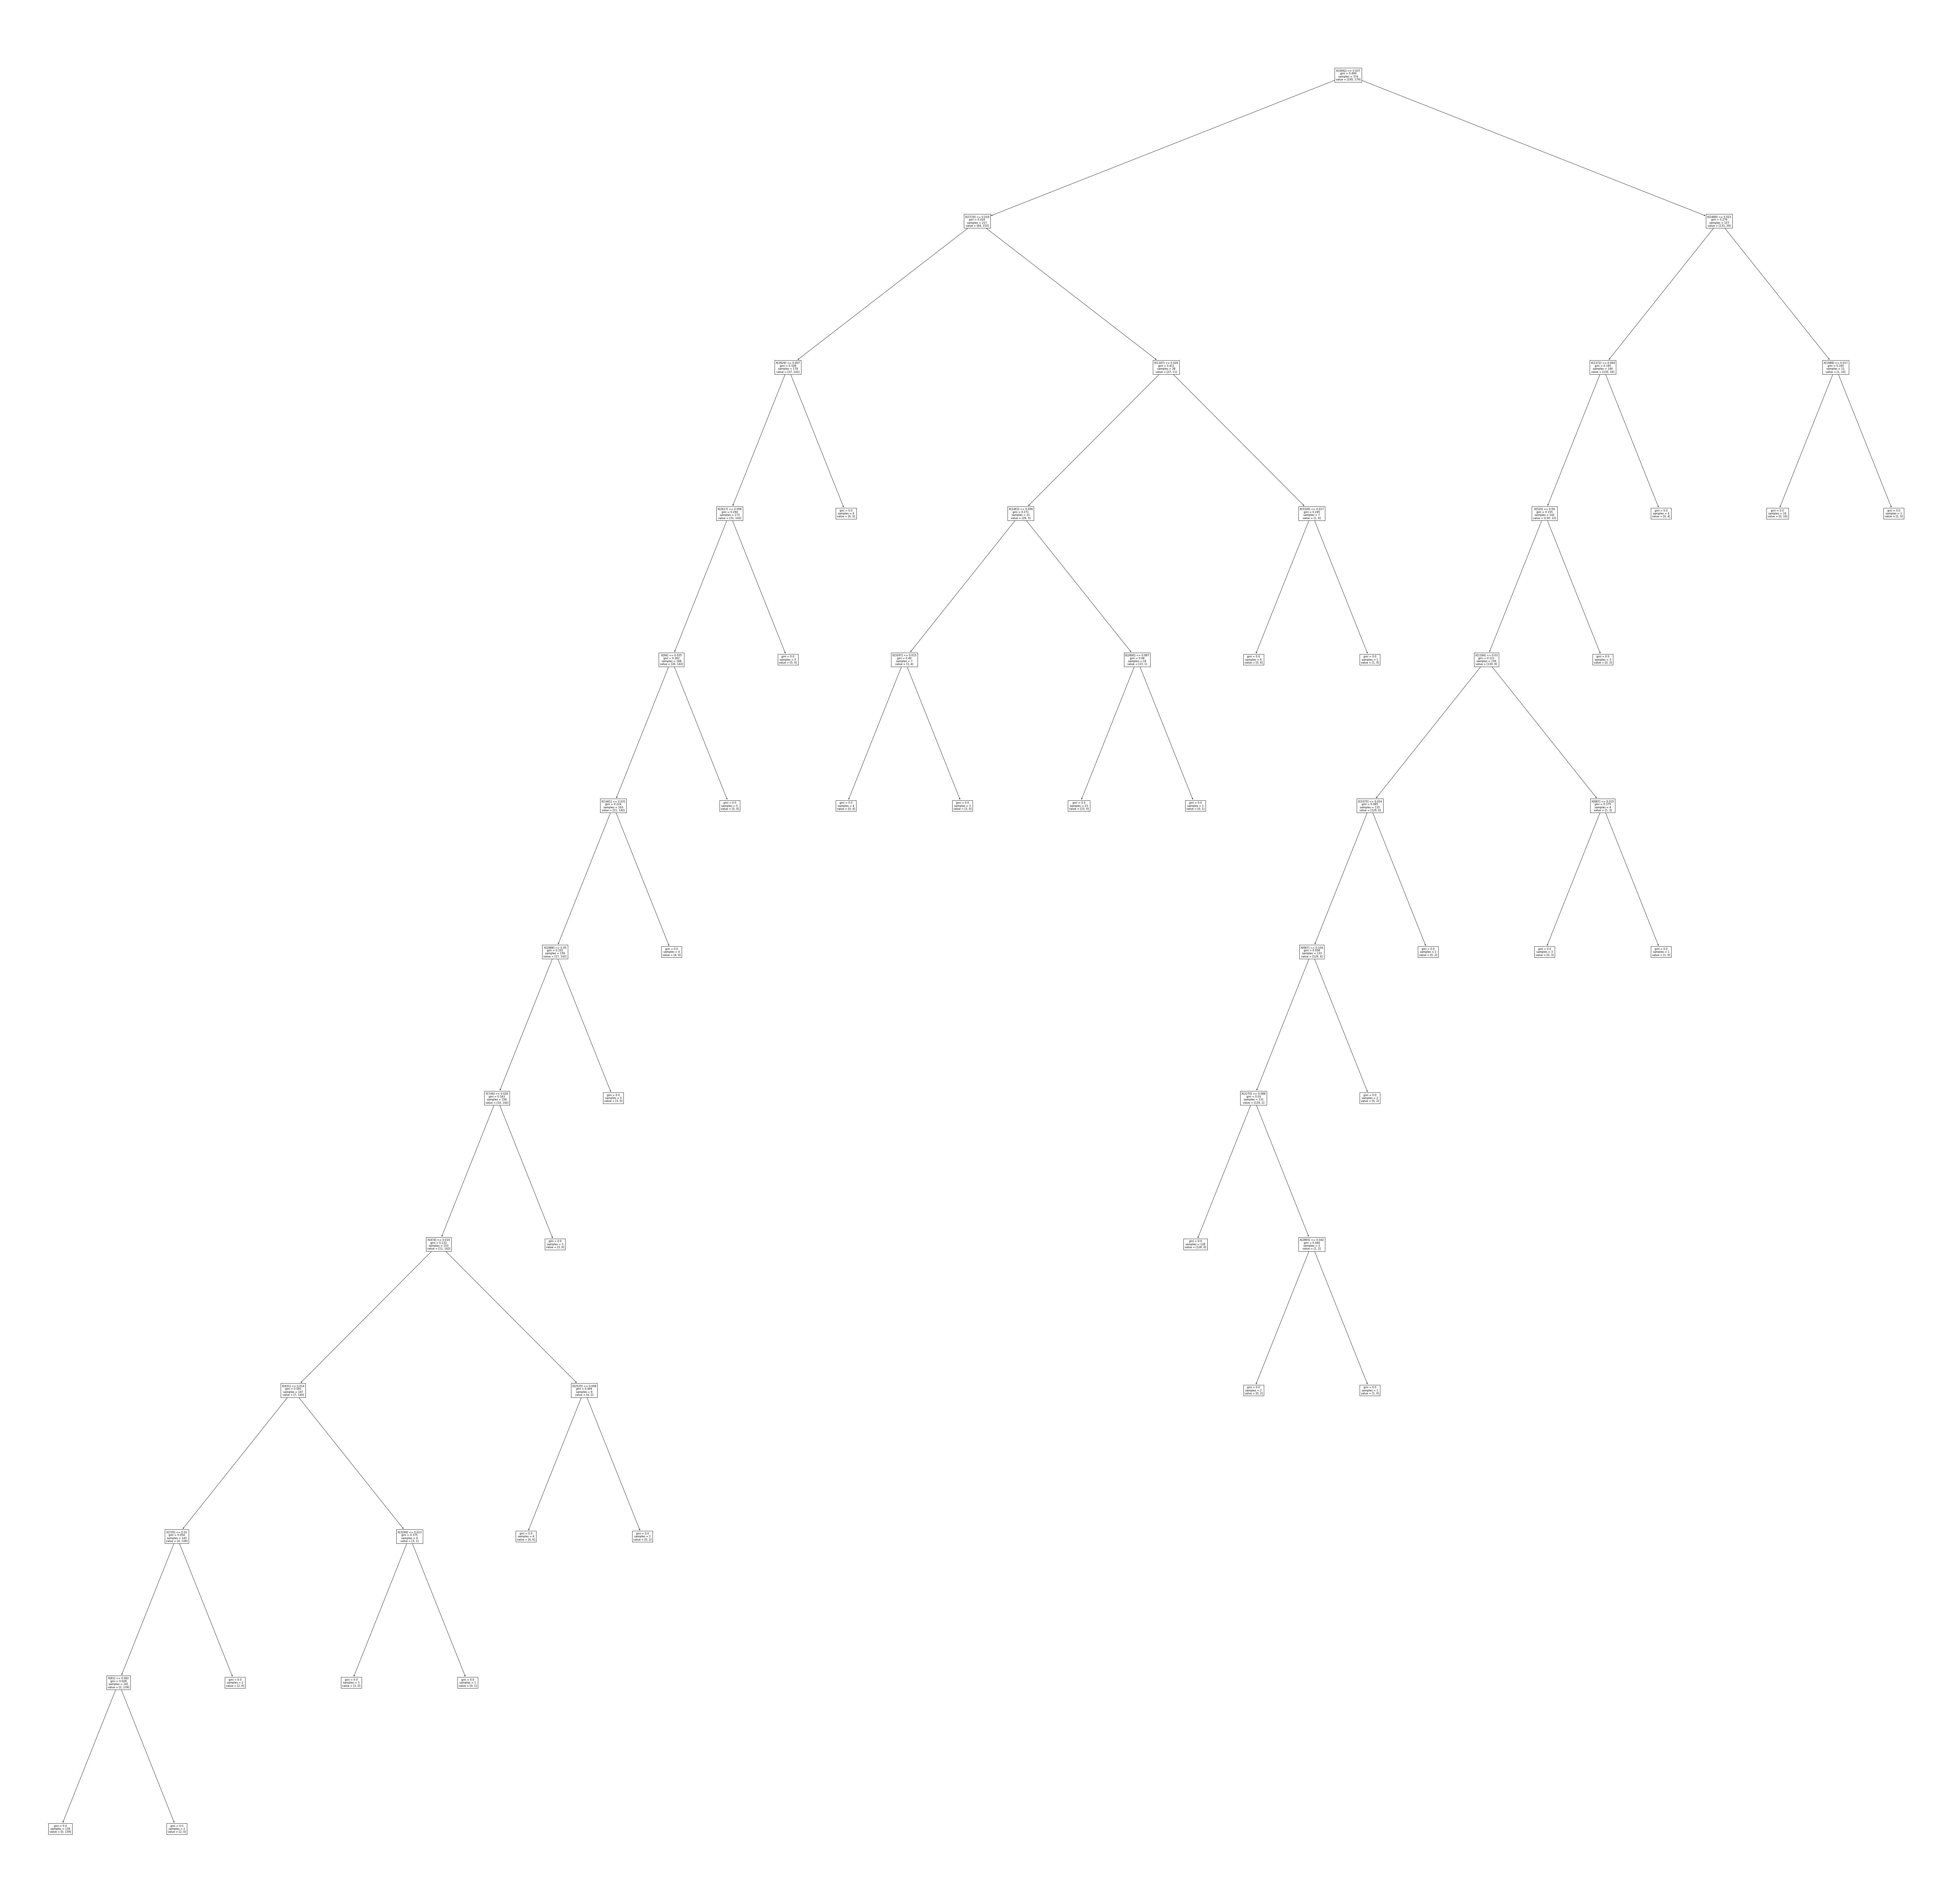

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

plt.figure(figsize=(120,120))
plot_tree(dtc,fontsize=9)
plt.show()

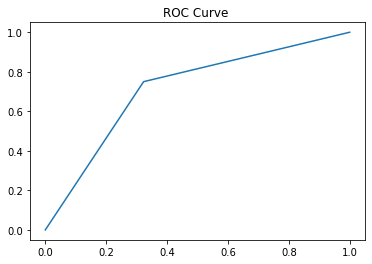

Area under curve : 


0.7134615384615385

In [ ]:
fpr, tpr, x = roc_curve(y_test,y_pred)
plt.title('ROC Curve ')
plt.plot(fpr,tpr)
plt.show()
print("Area under curve : ")
roc_auc_score(y_test,y_pred)

In [ ]:
dct['Decision_tree'] = round(accuracy_score(y_test, y_pred)*100,2)

Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)    

              precision    recall  f1-score   support

           0       0.72      0.91      0.80        65
           1       0.86      0.62      0.72        60

    accuracy                           0.77       125
   macro avg       0.79      0.76      0.76       125
weighted avg       0.79      0.77      0.76       125

[[59  6]
 [23 37]]


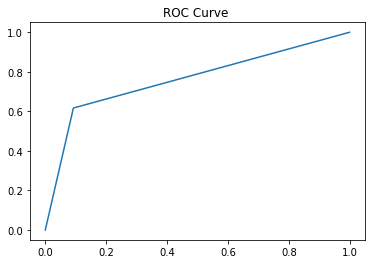

Area under curve : 


0.7621794871794871

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

fpr, tpr, x = roc_curve(y_test,y_pred)
plt.title('ROC Curve ')
plt.plot(fpr,tpr)
plt.show()
print("Area under curve : ")
roc_auc_score(y_test,y_pred)

In [ ]:
dct['Random_forest'] = round(accuracy_score(y_test, y_pred)*100,2)

NAIVE BAYES

              precision    recall  f1-score   support

           0       0.65      0.85      0.73        65
           1       0.75      0.50      0.60        60

    accuracy                           0.68       125
   macro avg       0.70      0.67      0.67       125
weighted avg       0.70      0.68      0.67       125

[[55 10]
 [30 30]]


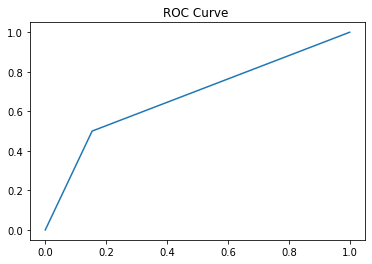

Area under curve : 


0.673076923076923

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
classifier = gnb.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

fpr, tpr, x = roc_curve(y_test,y_pred)
plt.title('ROC Curve ')
plt.plot(fpr,tpr)
plt.show()
print("Area under curve : ")
roc_auc_score(y_test,y_pred)

In [ ]:
dct['GaussianNB'] = round(accuracy_score(y_test, y_pred)*100,2)

              precision    recall  f1-score   support

           0       0.79      0.63      0.70        65
           1       0.67      0.82      0.74        60

    accuracy                           0.72       125
   macro avg       0.73      0.72      0.72       125
weighted avg       0.73      0.72      0.72       125

[[41 24]
 [11 49]]


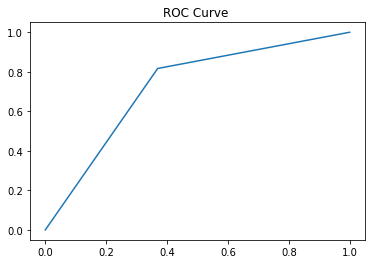

Area under curve : 


0.7237179487179487

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
classifier = bnb.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

fpr, tpr, x = roc_curve(y_test,y_pred)
plt.title('ROC Curve ')
plt.plot(fpr,tpr)
plt.show()
print("Area under curve : ")
roc_auc_score(y_test,y_pred)

In [ ]:
dct['BernoulliNB'] = round(accuracy_score(y_test, y_pred)*100,2)

              precision    recall  f1-score   support

           0       0.67      0.98      0.80        65
           1       0.97      0.48      0.64        60

    accuracy                           0.74       125
   macro avg       0.82      0.73      0.72       125
weighted avg       0.81      0.74      0.73       125

[[64  1]
 [31 29]]


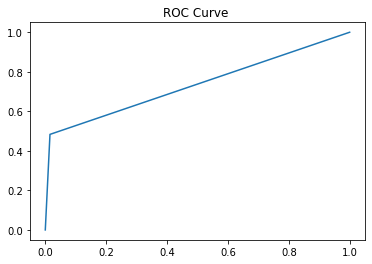

Area under curve : 


0.733974358974359

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
classifier = mnb.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

fpr, tpr, x = roc_curve(y_test,y_pred)
plt.title('ROC Curve ')
plt.plot(fpr,tpr)
plt.show()
print("Area under curve : ")
roc_auc_score(y_test,y_pred)

In [ ]:
dct['MultinomialNB'] = round(accuracy_score(y_test, y_pred)*100,2)

KNN

KNN using Eucliedian distance

In [ ]:
def KNN(k,Image):
    distances = []
    for i in range(len(X_train)):
        x = list(X_train[i])
        distance = 0
        for j in range(len(Image)):
            distance += (x[j]-Image[j])**2
        distance = np.sqrt(distance)
        distances.append(distance)
    order = np.argsort(distances)
    real = 0
    fake = 0
    for i in range(k):
        if y_train[order[i]]==0:
            real+=1
        else:
            fake+=1
    if real > fake:
        return 0
    else:
        return 1

for k in range(1,10,2):
    prediction=[]
    for i in range(len(X_test)):
        prediction.append(KNN(k,X_test[i]))
    print(f'K Value:{k}')
    print(accuracy_score(y_test,np.array(prediction)))

K Value:1
0.488
K Value:3
0.728
K Value:5
0.696
K Value:7
0.72
K Value:9
0.72


              precision    recall  f1-score   support

           0       0.70      0.80      0.75        65
           1       0.75      0.63      0.68        60

    accuracy                           0.72       125
   macro avg       0.72      0.72      0.72       125
weighted avg       0.72      0.72      0.72       125

[[52 13]
 [22 38]]


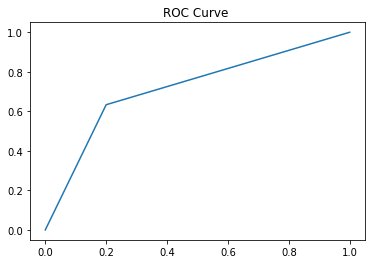

Area under curve : 


0.7166666666666667

In [ ]:
print(classification_report(y_test, prediction))
print(confusion_matrix(y_test,prediction))

fpr, tpr, x = roc_curve(y_test,prediction)
plt.title('ROC Curve ')
plt.plot(fpr,tpr)
plt.show()
print("Area under curve : ")
roc_auc_score(y_test,prediction)

In [ ]:
dct['KNN'] = round(accuracy_score(y_test, y_pred)*100,2)

Comparing Different Models

([<matplotlib.axis.YTick at 0x7f3c56713210>,
 <a list of 6 Text major ticklabel objects>)

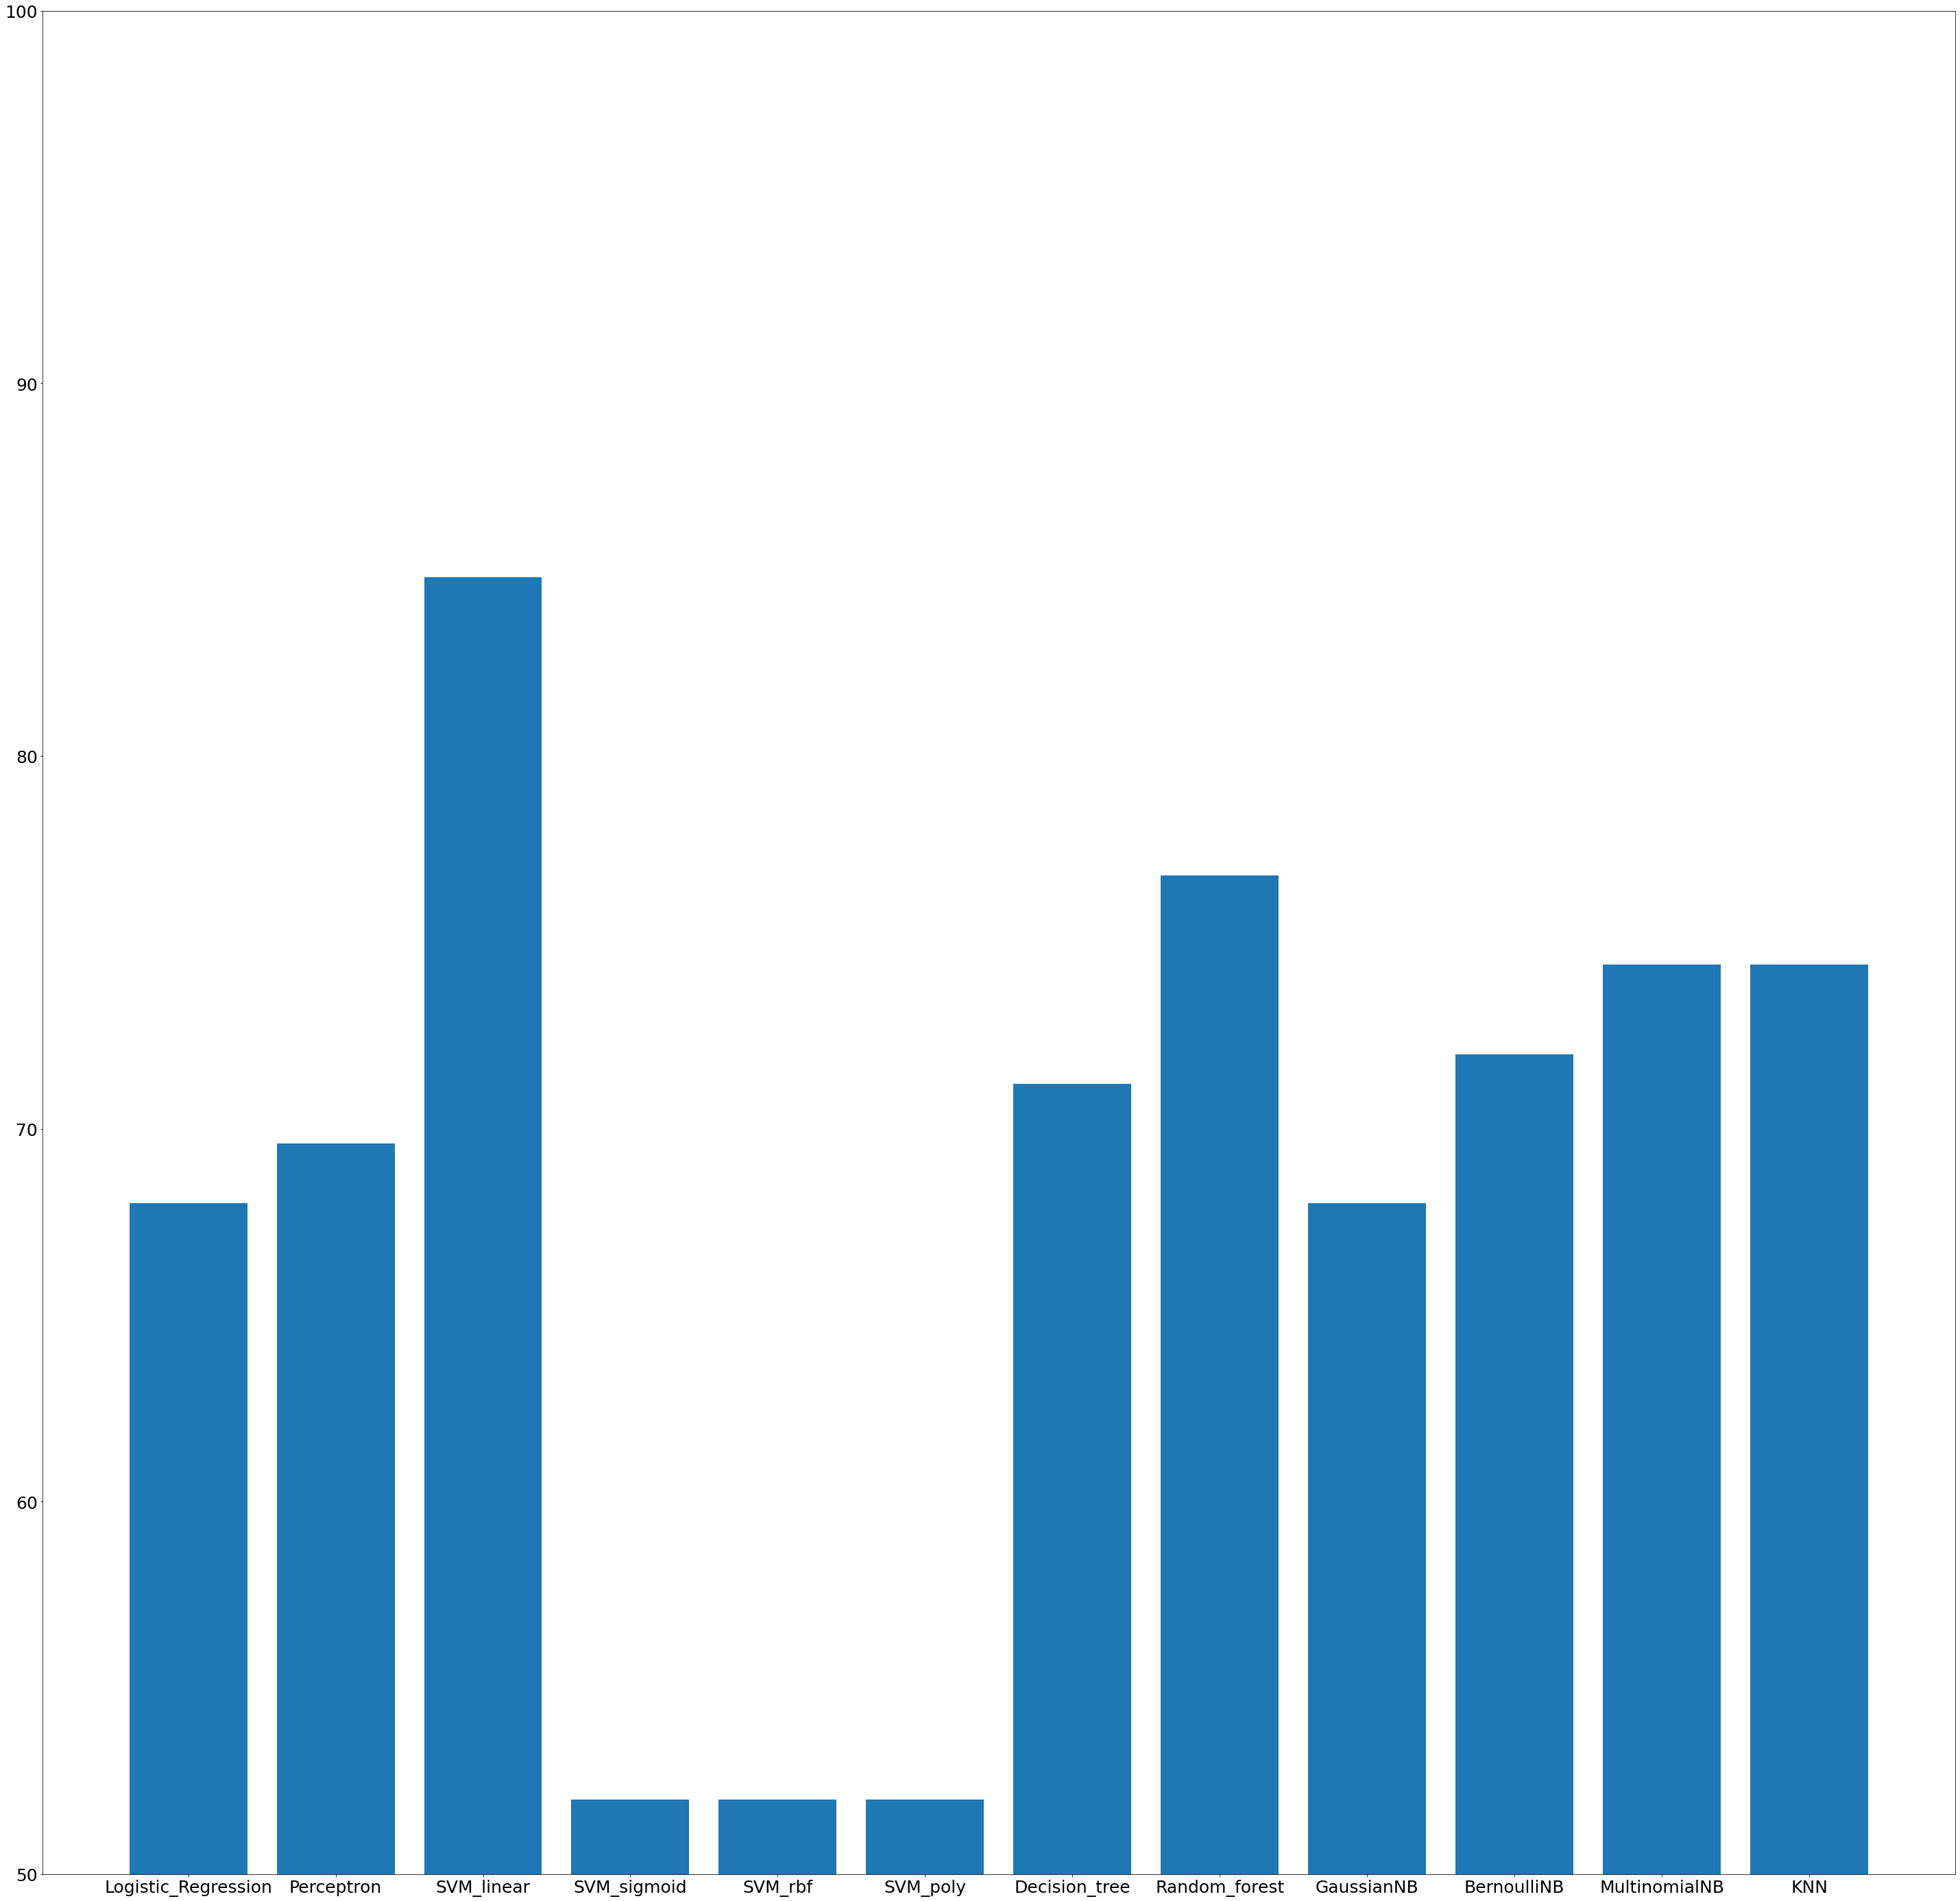

In [ ]:
plt.figure(figsize=(50,50))
plt.bar(list(dct.keys()),list(dct.values()))
plt.xticks(fontsize=25)
plt.ylim(50,100)
plt.yticks((50, 60, 70, 80, 90, 100),fontsize=25)

In [ ]:
print("Thus the best model in this case is :",max(dct,key=dct.get))

Thus the best model in this case is : SVM_linear


Principal Component Analysis(PCA)

In [ ]:
#PCA
def PCA(x , num_components):
     
    X_meaned = x - np.mean(x , axis = 0)
     
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

In [ ]:
X_reduced = PCA(realX , 2)

In [ ]:
m=X_reduced.shape[0] #number of training examples
n=X_reduced.shape[1] #number of features
n_iter=100
print(m)
print("Number of features is reduced from ",realX.shape[1],"to",n)

499
Number of features is reduced from  4000 to 2


In this case after doing the PCA , the accuracy of the models is reduced and it doesnot significantly reduce the runtime and complexity in this case. so, the data is fine to apply models without applying the PCA.

K Means Clustering (for the PCA applied data i.e. data with 2 features)

In [ ]:
K = 2
Centroids=np.array([]).reshape(n,0) 
import random
for i in range(K):
    rand=random.randint(0,m-1)
    Centroids=np.c_[Centroids,X_reduced[rand]]

In [ ]:
for i in range(n_iter):
     #step 2.a
      EuclidianDistance=np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((X_reduced-Centroids[:,k])**2,axis=1)
          EuclidianDistance=np.c_[EuclidianDistance,tempDist]
      C=np.argmin(EuclidianDistance,axis=1)+1
     #step 2.b
      Y={}
      for k in range(K):
          Y[k+1]=np.array([]).reshape(2,0)
      for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X_reduced[i]]
     
      for k in range(K):
          Y[k+1]=Y[k+1].T
    
      for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
      Output=Y

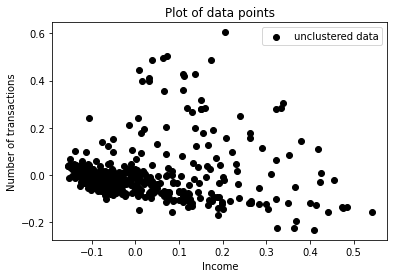

In [ ]:
plt.scatter(X_reduced[:,0],X_reduced[:,1],c='black',label='unclustered data')
plt.xlabel('Income')
plt.ylabel('Number of transactions')
plt.legend()
plt.title('Plot of data points')
plt.show()

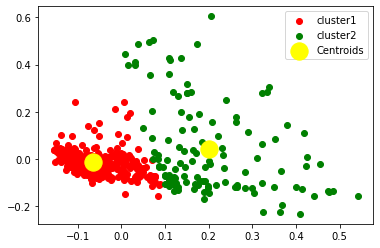

In [ ]:
color=['red','green']
labels=['cluster1','cluster2']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.legend()
plt.show()